# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [ ]:
!pip install keras

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv("sample_data/pollution_dataset.csv")
data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [3]:
features= ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']


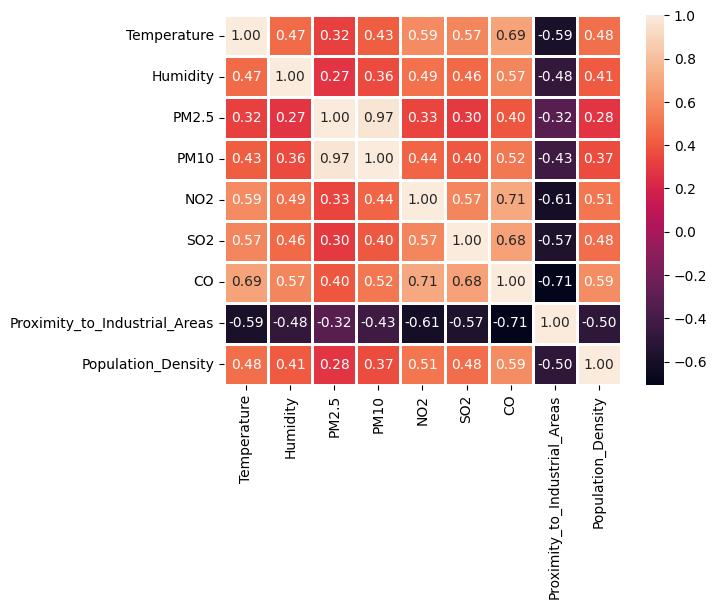

In [4]:
sns.heatmap(data[features].corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

<Axes: xlabel='Air Quality', ylabel='count'>

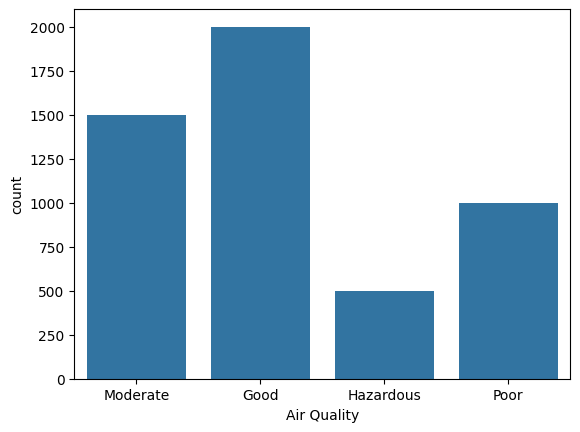

In [5]:
sns.countplot(data, x="Air Quality")

In [ ]:
sns.pairplot(data, vars=features, hue="Air Quality")

Output hidden; open in https://colab.research.google.com to view.

In [6]:
data['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [7]:
# air_encoder = {
#     'Hazardous' : 0,
#     'Poor' : 1,
#     'Moderate': 2,
#     'Good': 3
# }

# def encode_air(quality):
#   return air_encoder.get(quality)

# data['Air Quality'] = data['Air Quality'].apply(encode_air)
# encoder = LabelEncoder()
# data['Air Quality'] = encoder.fit_transform(data['Air Quality']);
encoder = OrdinalEncoder(categories=[["Hazardous","Poor","Moderate","Good"]])
data['Air Quality'] = encoder.fit_transform(data[['Air Quality']]);



In [8]:
data.sample(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
282,54.6,90.7,48.9,62.9,30.1,11.5,2.74,3.7,617,0.0
761,19.4,54.5,15.7,33.5,19.9,11.7,1.79,5.3,362,2.0
1071,31.4,79.4,55.7,62.7,24.1,11.5,1.46,7.8,361,2.0
1042,40.0,84.4,47.0,59.3,22.4,3.1,1.51,6.0,453,2.0
1149,34.3,84.1,12.2,21.4,17.4,13.6,1.29,5.9,626,2.0
2112,25.6,68.2,8.0,21.8,27.9,9.9,1.60,5.2,579,2.0
4020,32.9,66.0,7.6,11.9,22.8,11.4,1.67,6.9,686,2.0
2593,31.7,72.4,49.3,57.3,28.1,5.2,1.31,6.6,373,2.0
4191,36.6,71.0,5.0,28.2,26.2,26.7,1.93,4.7,523,1.0
4623,23.4,72.5,12.1,19.8,18.6,4.4,1.01,18.2,578,3.0


In [9]:
X, Y = data.drop(columns=["Air Quality"]), data['Air Quality']

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [12]:
X_scaled.shape[1]

9

In [16]:
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(4, kernel_initializer="uniform", activation="softmax"),
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 916 (3.58 KB)

 Trainable params: 916 (3.58 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history1 = model1.fit(X_train, Y_train, validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5739 - loss: 1.2919 - val_accuracy: 0.6250 - val_loss: 0.7397
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7235 - loss: 0.6405 - val_accuracy: 0.8950 - val_loss: 0.4501
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8932 - loss: 0.3778 - val_accuracy: 0.9025 - val_loss: 0.2938
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9099 - loss: 0.2661 - val_accuracy: 0.9350 - val_loss: 0.2165
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9277 - loss: 0.2107 - val_accuracy: 0.9425 - val_loss: 0.1896
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9281 - loss: 0.1880 - val_accuracy: 0.9350 - val_loss: 0.1764
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9277 - loss: 0.1758 - val_accuracy: 0.9375 - val_loss: 0.1642
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9317 - loss: 0.1759 - val_accuracy: 0.

In [42]:
model2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, kernel_initializer="uniform", activation="tanh"),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(4, kernel_initializer="uniform", activation="softmax")
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,316 (12.95 KB)

 Trainable params: 3,316 (12.95 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history2 = model2.fit(X_train, Y_train, validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4769 - loss: 1.2337 - val_accuracy: 0.6075 - val_loss: 0.7043
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6631 - loss: 0.6643 - val_accuracy: 0.7025 - val_loss: 0.5973
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.5233 - val_accuracy: 0.9175 - val_loss: 0.2751
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9210 - loss: 0.2433 - val_accuracy: 0.9275 - val_loss: 0.1667
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9383 - loss: 0.1678 - val_accuracy: 0.9400 - val_loss: 0.1541
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9359 - loss: 0.1654 - val_accuracy: 0.9425 - val_loss: 0.1489
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9370 - loss: 0.1659 - val_accuracy: 0.9325 - val_loss: 0.1723
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9379 - loss: 0.1623 - val_accuracy: 0.

In [46]:
model3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, kernel_initializer="uniform", activation="linear"),
    Dense(64, kernel_initializer="uniform", activation="leaky_relu"),
    Dense(32, kernel_initializer="uniform", activation="leaky_relu"),
    Dense(16, kernel_initializer="uniform", activation="leaky_relu"),
    Dense(4, kernel_initializer="uniform", activation='softmax')
])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                     │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,212 (47.70 KB)

 Trainable params: 12,212 (47.70 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history3 = model3.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5276 - loss: 1.1833 - val_accuracy: 0.6550 - val_loss: 0.6558
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - loss: 0.6326 - val_accuracy: 0.7113 - val_loss: 0.5889
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.5928 - val_accuracy: 0.7425 - val_loss: 0.5236
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7668 - loss: 0.5171 - val_accuracy: 0.8062 - val_loss: 0.4613
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 0.4274 - val_accuracy: 0.9312 - val_loss: 0.2625
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.2337 - val_accuracy: 0.9275 - val_loss: 0.1785
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9234 - loss: 0.1896 - val_accuracy: 0.9337 - val_loss: 0.1655
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9461 - loss: 0.1457 - val_accuracy: 0.

In [48]:
print("Model 1: ")
model_1_eval = model1.evaluate(X_test, Y_test, verbose=0)
print(f"Accuracy: {model_1_eval[1]:.2f}")


print("Model 2: ")
model_2_eval = model2.evaluate(X_test, Y_test, verbose=0)
print(f"Accuracy: {model_2_eval[1]:.2f}")


print("Model 3: ")
model_3_eval = model3.evaluate(X_test, Y_test, verbose=0)
print(f"Accuracy: {model_3_eval[1]:.2f}")

Model 1: 
Accuracy: 0.94
Model 2: 
Accuracy: 0.94
Model 3: 
Accuracy: 0.95


In [49]:
import numpy as np

y_pred1 = np.argmax(model1.predict(X_test), axis=1)
print("Classification Report for Model 1")
print(classification_report(Y_test, y_pred1, target_names=encoder.categories_[0]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report for Model 1
              precision    recall  f1-score   support

   Hazardous       0.90      0.82      0.86       111
        Poor       0.82      0.88      0.85       186
    Moderate       0.96      0.95      0.95       294
        Good       1.00      1.00      1.00       409

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



In [50]:
y_pred2 = np.argmax(model2.predict(X_test), axis=1)
print("Classification Report for Model 2")
print(classification_report(Y_test, y_pred2, target_names=encoder.categories_[0]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report for Model 2
              precision    recall  f1-score   support

   Hazardous       0.85      0.88      0.87       111
        Poor       0.85      0.84      0.85       186
    Moderate       0.96      0.95      0.96       294
        Good       1.00      1.00      1.00       409

    accuracy                           0.94      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.94      0.94      0.94      1000



In [51]:
y_pred3 = np.argmax(model3.predict(X_test), axis=1)
print("Classification Report for Model 3")
print(classification_report(Y_test, y_pred3, target_names=encoder.categories_[0]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report for Model 3
              precision    recall  f1-score   support

   Hazardous       0.96      0.77      0.85       111
        Poor       0.83      0.90      0.86       186
    Moderate       0.95      0.97      0.96       294
        Good       1.00      1.00      1.00       409

    accuracy                           0.95      1000
   macro avg       0.93      0.91      0.92      1000
weighted avg       0.95      0.95      0.95      1000



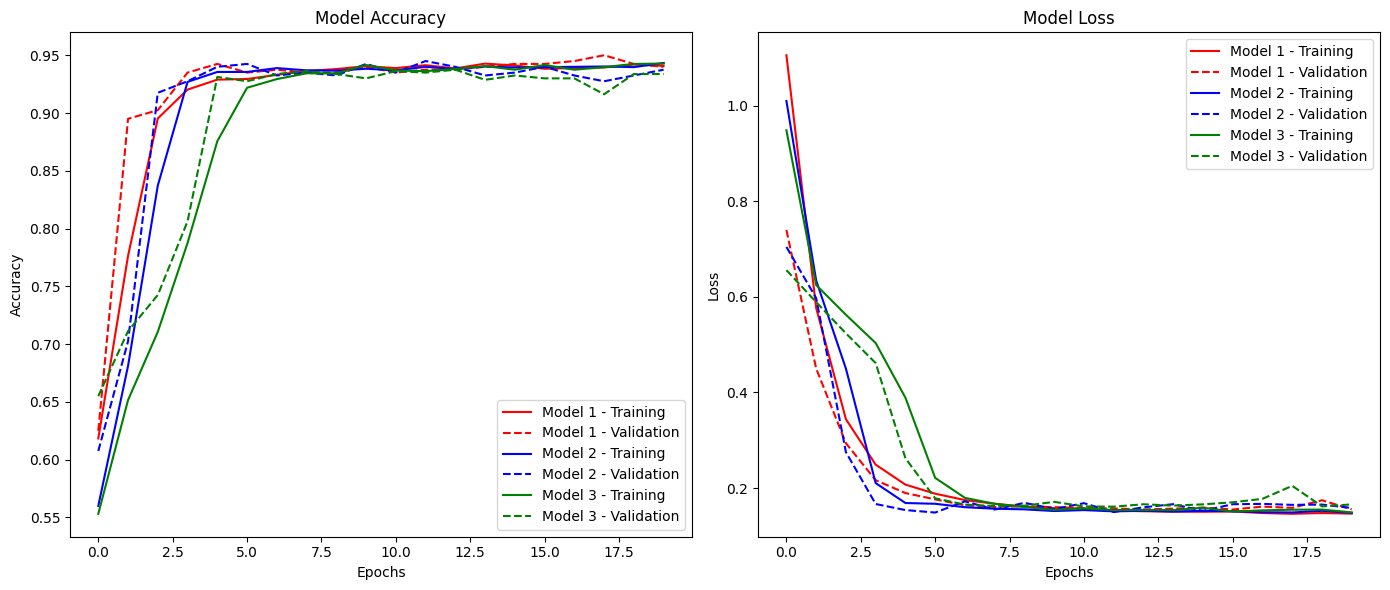

In [52]:
def plot_history(histories, labels):
    plt.figure(figsize=(14, 6))

    colors = ['red', 'blue', 'green']
    plt.subplot(1,2,1)
    for index,(history, label) in enumerate(zip(histories, labels)):
        color = colors[index % len(colors)]
        plt.plot(history.history['accuracy'], label=f'{label} - Training', color=color)
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validation', linestyle='dashed', color=color)
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    for index,(history, label) in enumerate(zip(histories, labels)):
        color = colors[index % len(colors)]
        plt.plot(history.history['loss'], label=f'{label} - Training', color=color)
        plt.plot(history.history['val_loss'], label=f'{label} - Validation', linestyle='dashed', color=color)
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history([history1, history2, history3], labels=["Model 1", "Model 2", "Model 3"])